In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

Load the Data Set

In [20]:
url = 'https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv'
df = pd.read_csv(url)
# Selecting columns I am interested in
columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price']
df = df.loc[:, columns]
df.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.00,1180,5650,1.0,221900.0
1,3,2.25,2570,7242,2.0,538000.0
2,2,1.00,770,10000,1.0,180000.0
3,4,3.00,1960,5000,1.0,604000.0
4,3,2.00,1680,8080,1.0,510000.0
5,4,4.50,5420,101930,1.0,1225000.0
6,3,2.25,1715,6819,2.0,257500.0
7,3,1.50,1060,9711,1.0,291850.0
8,3,1.00,1780,7470,1.0,229500.0
9,3,2.50,1890,6560,2.0,323000.0


Arrange Data into Features and Target

In [21]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']
x = df.loc[:, features]
y = df.loc[:, ['price']]

Split Data Into Training and Testing Sets

In the code below, train_test_split splits the data and returns a list which contains four NumPy arrays, while train_size = .75 puts 75 percent of the data into a training set and the remaining 25 percent into a testing set

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .75)

In [23]:
print(x.shape,y.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(21613, 5) (21613, 1) (16209, 5) (5404, 5) (16209, 1) (5404, 1)


In [24]:
from sklearn.tree import DecisionTreeRegressor

 Make An Instance of the Model

In the code below, I set the hyperparameter max_depth = 2 to pre-prune my tree to make sure it doesn’t have a depth greater than two.

In [25]:
reg = DecisionTreeRegressor(max_depth = 2, random_state = 0)

Train the Model on the Data

In [26]:
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

Predict Labels of Unseen Test Data

In [27]:
# Predicting multiple observations
reg.predict(x_test[0:10])

array([ 406622.58288211, 1095030.54807692,  406622.58288211,
        406622.58288211,  657115.94280443,  406622.58288211,
        406622.58288211,  657115.94280443,  657115.94280443,
       1095030.54807692])

For the multiple predictions above, notice how many times some of the predictions are repeated. If you are wondering why, I encourage you to check out the code below, which will start by looking at a single observation/house and then proceed to examine how the model makes its prediction.

In [28]:
x_test.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors
17384,2,1.5,1430,1650,3.0


In [29]:
# predict 1 observation.
reg.predict(x_test.iloc[0].values.reshape(1,-1))

c:\Users\kloul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([406622.58288211])

Real value of the example

In [33]:
df.loc[(df['bedrooms'] == 2) & (df['sqft_living'] == 1430)  & (df['sqft_lot'] == 1650)]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
17384,2,1.5,1430,1650,3.0,297000.0


Measuring Train Test Split Model Performance

In [34]:
score = reg.score(x_test, y_test)
print(score)

0.4380405655348807


Hyperparameter tuning

The max_depth (hyperparameter) is not the same thing as depth (parameter of a decision tree), but max_depth is a way to pre-prune a decision tree.

In [35]:
max_depth_range = list(range(1, 25))
# List to store the average RMSE for each value of max_depth:
r2_list = []
for depth in max_depth_range:
    reg = DecisionTreeRegressor(max_depth = depth,
                            random_state = 0)
    reg.fit(x_train, y_train)   
    
    score = reg.score(x_test, y_test)
    r2_list.append(score)

In [36]:
print(r2_list)

[0.28670606505773344, 0.4380405655348807, 0.5209625507176909, 0.5415074050140177, 0.5558073822490773, 0.5230510149527818, 0.5370955067984785, 0.5268324958507721, 0.5023134409508825, 0.478646153956204, 0.4343782742226926, 0.43621228880607066, 0.3981620801631658, 0.358430945092326, 0.3417848907275264, 0.31565418228982534, 0.303757076580322, 0.30258313236807355, 0.29053151847254954, 0.27237090255999885, 0.2621446493884838, 0.2296840639188732, 0.23407072538583595, 0.23243605596391725]


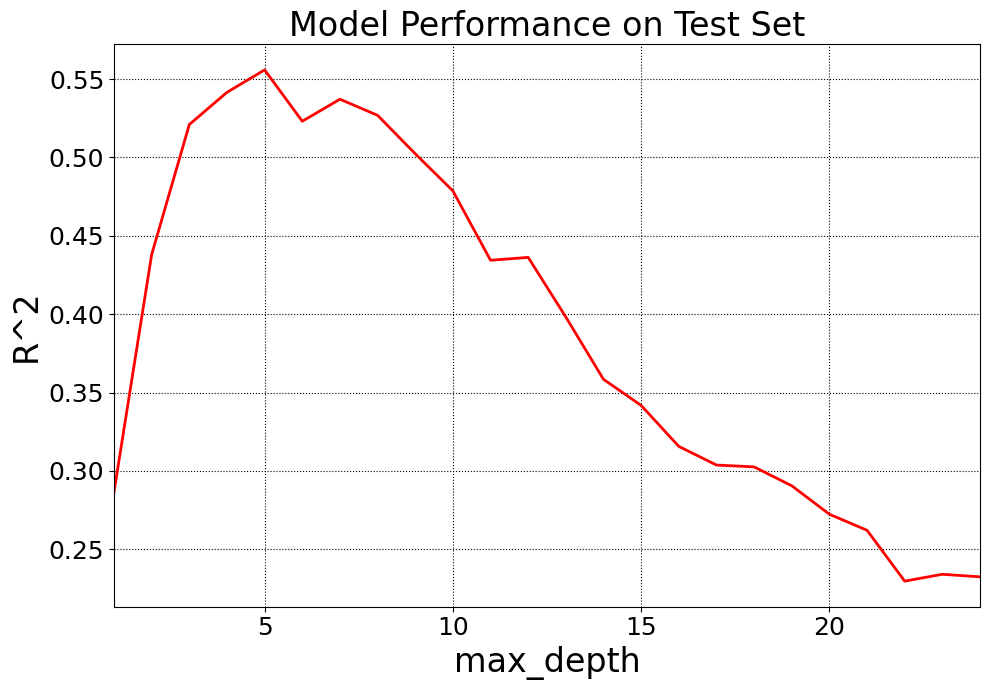

In [37]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,
                       figsize = (10,7),
                       facecolor = 'white');
ax.plot(max_depth_range,
       r2_list,
       lw=2,
       color='r')
ax.set_xlim([1, max(max_depth_range)])
ax.grid(True,
       axis = 'both',
       zorder = 0,
       linestyle = ':',
       color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('R^2', fontsize = 24)
ax.set_title('Model Performance on Test Set', fontsize = 24)
fig.tight_layout()

The best score R^2 is done with a max_depth of 5
Let's verify it!

In [38]:
reg1 = DecisionTreeRegressor(max_depth = 5, random_state = 0)

In [40]:
reg1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [41]:
# predict 1 observation.
reg1.predict(x_test.iloc[0].values.reshape(1,-1))

c:\Users\kloul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([417038.32831325])

In [42]:
score = reg1.score(x_test, y_test)
print(score)

0.5558073822490773
